In [2]:
import cdflib
import numpy as np
import pandas as pd

path = './swe/2006/ac_h2_swe_20060204_v09.cdf'
f = cdflib.CDF(path)
# print(f.cdf_info())
# print(type(f.cdf_info()))
variable_names = f.cdf_info().rVariables
print(variable_names)
variable_name =  'Np'
data_variable = f.varget(variable_name)
s = pd.Series(data_variable, name=f'{variable_name}')
# f.close()
display(s)
s.mean()

['Epoch', 'Time_PB5', 'unit_time', 'label_time', 'format_time', 'Np', 'Vp', 'Tpr', 'alpha_ratio', 'V_GSE', 'label_V_GSE', 'V_RTN', 'label_V_RTN', 'V_GSM', 'label_V_GSM', 'SC_pos_GSE', 'label_pos_GSE', 'SC_pos_GSM', 'label_pos_GSM']


0     6.9322
1     7.6494
2     7.6808
3     8.5382
4     7.8612
5     7.6707
6     8.9310
7     6.8343
8     6.2450
9     6.4432
10    6.0374
11    6.3178
12    6.3396
13    5.6082
14    5.0885
15    5.1276
16    4.7135
17    4.0767
18    5.0440
19    5.0772
20    4.6078
21    6.5058
22    7.9558
23    7.0728
Name: Np, dtype: float32

6.4316125

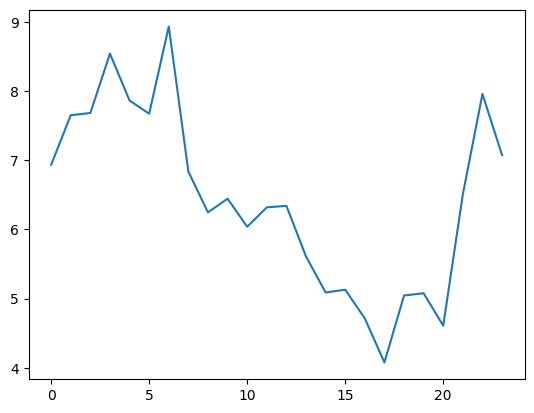

In [3]:
import matplotlib.pyplot as plt
plt.plot(s)

In [4]:
date_list = pd.date_range(start='1998-02-04', end='2021-06-01', freq='D')
date_list

DatetimeIndex(['1998-02-04', '1998-02-05', '1998-02-06', '1998-02-07',
               '1998-02-08', '1998-02-09', '1998-02-10', '1998-02-11',
               '1998-02-12', '1998-02-13',
               ...
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
               '2021-05-31', '2021-06-01'],
              dtype='datetime64[ns]', length=8519, freq='D')

In [5]:
solar_wind = pd.DataFrame(index=date_list, columns=['Np', 'Vp', 'Tpr'])

In [6]:
solar_wind.head()

,Np,Vp,Tpr
1998-02-04,NaN,NaN,NaN
1998-02-05,NaN,NaN,NaN
1998-02-06,NaN,NaN,NaN
1998-02-07,NaN,NaN,NaN
1998-02-08,NaN,NaN,NaN


In [7]:
date_list[0].strftime('%Y')

'1998'

In [8]:
# import cdflib
# import numpy as np
# import pandas as pd

# path_base = 'C:/Users/User/Desktop/mag_data/spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h2/'

# for date in date_list:
#     path = path_base + date.strftime('%Y') + '/ac_h2_mfi_' + date.strftime('%Y%m%d') + '_v05.cdf'
#     f = cdflib.CDF(path)
#     mag_mag = f.varget('Magnitude')
#     s = pd.Series(mag_mag, name='Magnitude')
#     magnetic_mag[date.strftime('%Y%m%d')] = s.mean()

In [9]:
li1 = date_list[date_list <= '2003-10-29'] # 06
li2 = date_list[(date_list > '2003-10-29') & (date_list <= '2005-02-26')] # 07
li3 = date_list[(date_list > '2005-02-26') & (date_list <= '2005-03-24')] # 08
li4 = date_list[(date_list > '2005-03-24') & (date_list <= '2006-12-06')] # 09
li5 = date_list[(date_list > '2006-12-06') & (date_list <= '2012-12-31')] # 10
li6 = date_list[(date_list > '2012-12-31')] # 11

In [10]:
print(li1[0], li1[-1])
print(li2[0], li2[-1])
print(li3[0], li3[-1])
print(li4[0], li4[-1])
print(li5[0], li5[-1])
print(li6[0], li6[-1])

1998-02-04 00:00:00 2003-10-29 00:00:00
2003-10-30 00:00:00 2005-02-26 00:00:00
2005-02-27 00:00:00 2005-03-24 00:00:00
2005-03-25 00:00:00 2006-12-06 00:00:00
2006-12-07 00:00:00 2012-12-31 00:00:00
2013-01-01 00:00:00 2021-06-01 00:00:00


In [11]:
import cdflib
import numpy as np
import pandas as pd

path_base = 'C:/Users/User/Desktop/ai project/swe/'

cols = ['Np', 'Vp', 'Tpr', 'alpha_ratio']

for col in cols:
    for date in li1:
        path = path_base + date.strftime('%Y') + '/ac_h2_swe_' + date.strftime('%Y%m%d') + '_v06.cdf'
        f = cdflib.CDF(path)
        temp = f.varget(col)
        s = pd.Series(temp)
        solar_wind.loc[date.strftime('%Y-%m-%d'), col] = s.mean()

    for date in li2:
        path = path_base + date.strftime('%Y') + '/ac_h2_swe_' + date.strftime('%Y%m%d') + '_v07.cdf'
        f = cdflib.CDF(path)
        temp = f.varget(col)
        s = pd.Series(temp)
        solar_wind.loc[date.strftime('%Y-%m-%d'), col] = s.mean()
        
    for date in li3:
        path = path_base + date.strftime('%Y') + '/ac_h2_swe_' + date.strftime('%Y%m%d') + '_v08.cdf'
        f = cdflib.CDF(path)
        temp = f.varget(col)
        s = pd.Series(temp)
        solar_wind.loc[date.strftime('%Y-%m-%d'), col] = s.mean()

    for date in li4:
        path = path_base + date.strftime('%Y') + '/ac_h2_swe_' + date.strftime('%Y%m%d') + '_v09.cdf'
        f = cdflib.CDF(path)
        temp = f.varget(col)
        s = pd.Series(temp)
        solar_wind.loc[date.strftime('%Y-%m-%d'), col] = s.mean()

    for date in li5:
        path = path_base + date.strftime('%Y') + '/ac_h2_swe_' + date.strftime('%Y%m%d') + '_v10.cdf'
        f = cdflib.CDF(path)
        temp = f.varget(col)
        s = pd.Series(temp)
        solar_wind.loc[date.strftime('%Y-%m-%d'), col] = s.mean()

    for date in li6:
        path = path_base + date.strftime('%Y') + '/ac_h2_swe_' + date.strftime('%Y%m%d') + '_v11.cdf'
        f = cdflib.CDF(path)
        temp = f.varget(col)
        s = pd.Series(temp)
        solar_wind.loc[date.strftime('%Y-%m-%d'), col] = s.mean()

<AxesSubplot:>

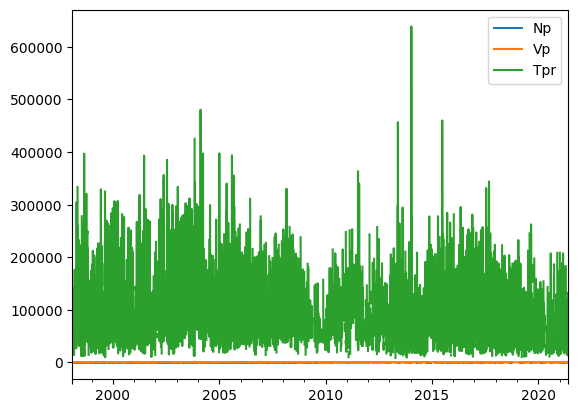

In [39]:
solar_wind[solar_wind>-100].plot()

In [41]:
len(solar_wind)

8519

<AxesSubplot:>

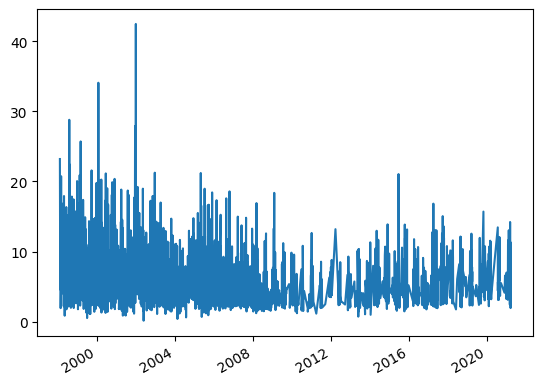

In [46]:
solar_wind[solar_wind['Np']>-100]['Np'].plot()

In [49]:
solar_wind[solar_wind['Vp']>-100]

,Np,Vp,Tpr
1998-02-05,23.195925,303.594574,15269.925781
1998-02-06,14.683708,311.63208,21631.0
1998-02-07,17.83976,320.606659,31560.0
1998-02-08,13.716655,341.175812,55661.796875
1998-02-09,16.617191,392.79248,67616.101562
...,...,...,...
2021-05-28,-9999999848243207295109594873856.0,419.640411,-5833333043320900986375734558720.0
2021-05-29,-9583333893106468433013713666048.0,408.793732,-2083333402461153154366930157568.0
2021-05-30,-8750000169444261286878189191168.0,439.796234,60986.691406
2021-05-31,-9999999848243207295109594873856.0,372.240387,29408.570312


<AxesSubplot:>

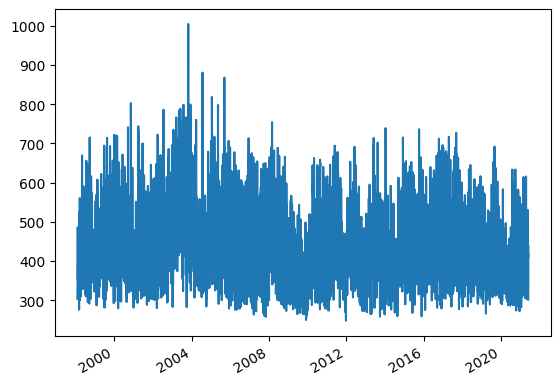

In [47]:
solar_wind[solar_wind['Vp']>-100]['Vp'].plot()

<AxesSubplot:>

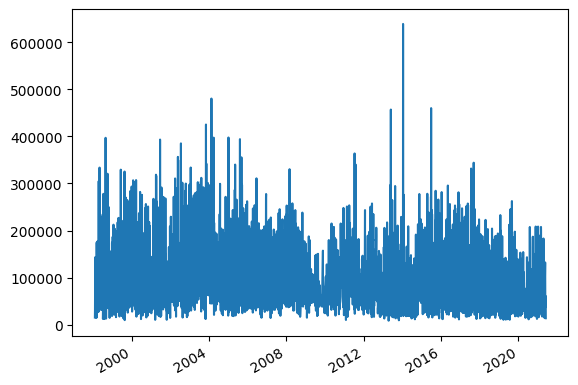

In [50]:
solar_wind[solar_wind['Tpr']>-100]['Tpr'].plot()

In [53]:
solar_wind[(solar_wind['Vp']>-100)&(solar_wind['Np']>-100)&(solar_wind['Tpr']>-100)]

,Np,Vp,Tpr
1998-02-05,23.195925,303.594574,15269.925781
1998-02-06,14.683708,311.63208,21631.0
1998-02-07,17.83976,320.606659,31560.0
1998-02-08,13.716655,341.175812,55661.796875
1998-02-09,16.617191,392.79248,67616.101562
...,...,...,...
2021-03-22,1.941596,592.564148,136265.484375
2021-03-23,3.340633,489.807037,69773.6875
2021-03-24,7.567883,411.329987,17350.070312
2021-03-25,8.109667,418.203735,81384.570312


In [4]:
sw_normal = solar_wind[(solar_wind['Vp']>-100)&(solar_wind['Np']>-100)&(solar_wind['Tpr']>-100)]

In [66]:
len(sw_normal)

3893

In [71]:
len(pd.date_range(start='1998-02-05', end='2021-03-06', freq='D'))

8431

<AxesSubplot:>

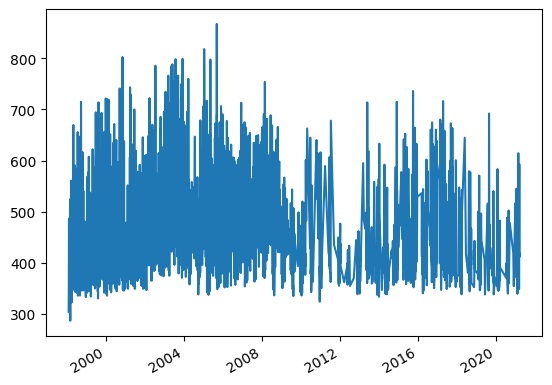

In [55]:
sw_normal['Vp'].plot()

In [57]:
smooth_Vp = [sw_normal['Vp'][i:i+100].mean() for i in range(len(sw_normal['Vp'])-100)]

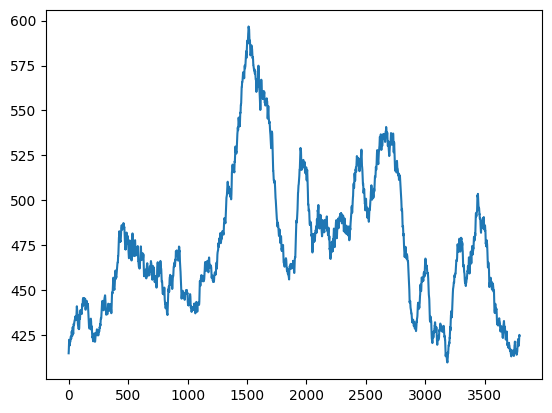

In [58]:
plt.plot(smooth_Vp)

<AxesSubplot:>

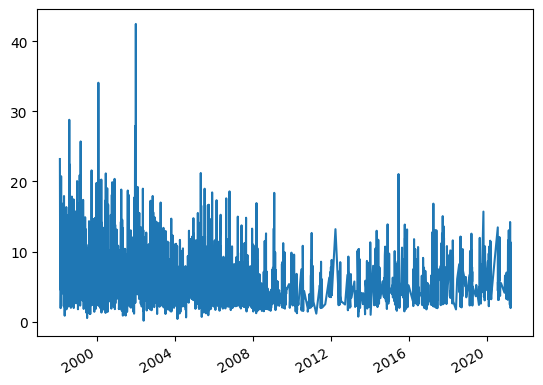

In [59]:
sw_normal['Np'].plot()

In [60]:
smooth_Np = [sw_normal['Np'][i:i+100].mean() for i in range(len(sw_normal['Np'])-100)]

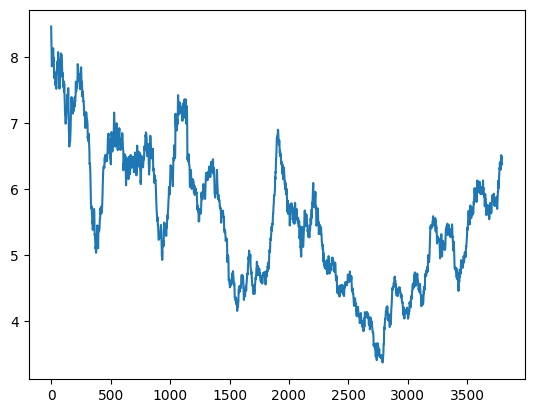

In [61]:
plt.plot(smooth_Np)

<AxesSubplot:>

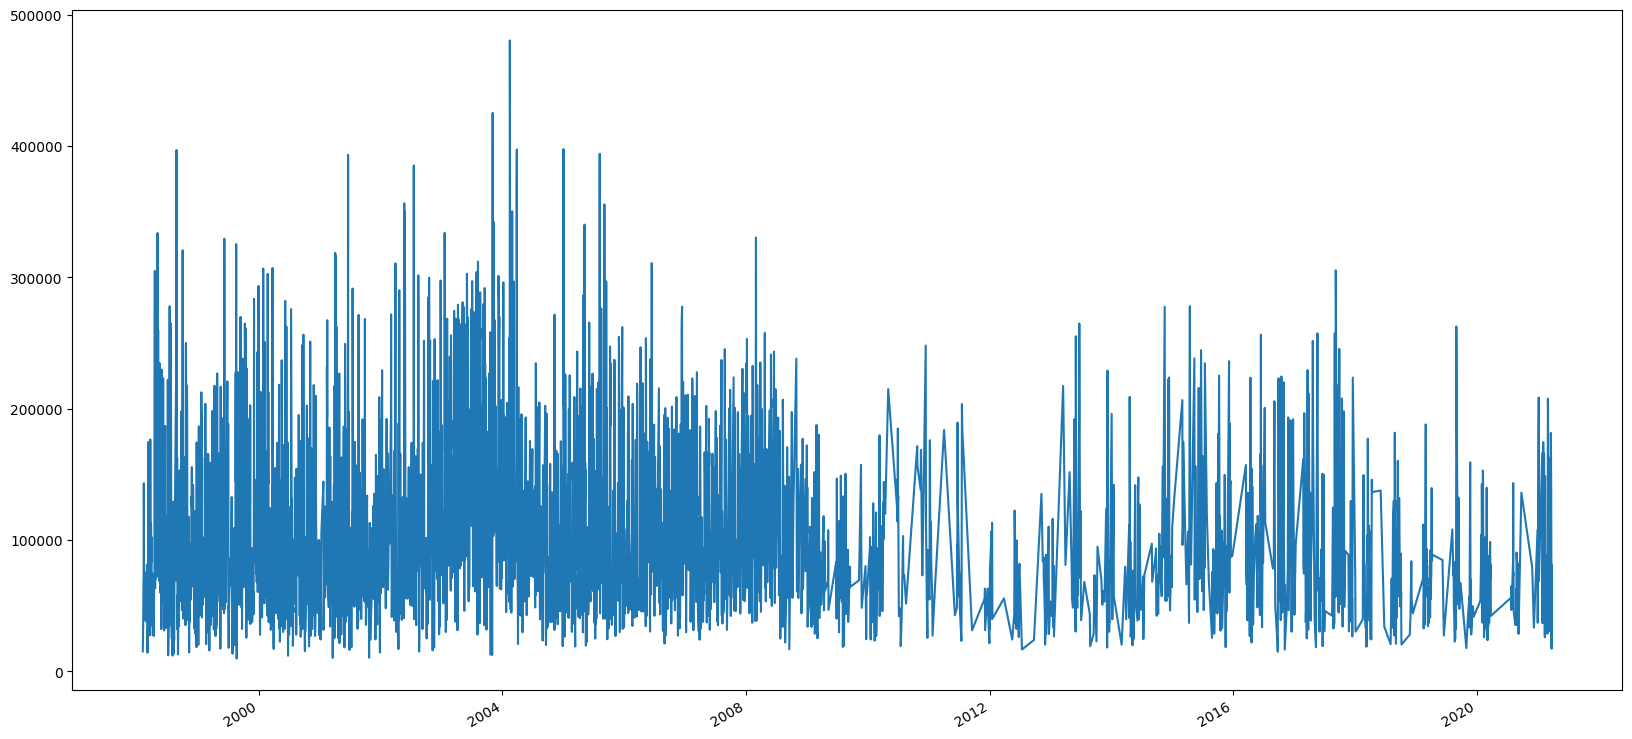

In [7]:
sw_normal['Tpr'].plot(figsize=(20,10))

In [63]:
smooth_Tpr = [sw_normal['Tpr'][i:i+100].mean() for i in range(len(sw_normal['Tpr'])-100)]

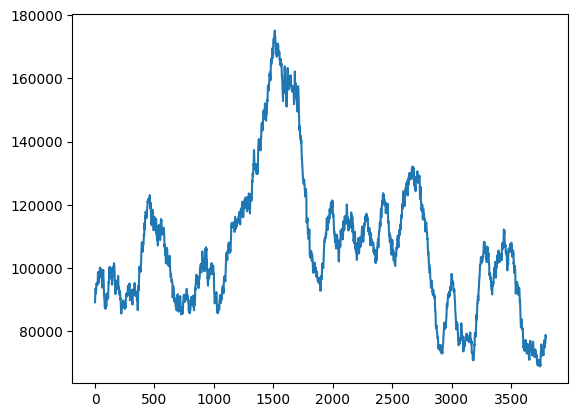

In [64]:
plt.plot(smooth_Tpr)

In [73]:
import pickle

with open('./data/sw.pkl', 'wb') as f:
    pickle.dump(solar_wind, f)

In [3]:
import pickle

with open('C:/Users/User/Desktop/ai project/data/sw.pkl', 'rb') as f:
    solar_wind = pickle.load(f)

In [5]:
import pickle

with open('C:/Users/User/Desktop/ai project/data/sw_normal.pkl', 'wb') as f:
    pickle.dump(sw_normal, f)